# Programming Exercise 1: Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy #for hard copy assignment
from mpl_toolkits.mplot3d import Axes3D #for 3d furface plot
%matplotlib inline

## 1 Simple Octave/MATLAB function
Return a 5 x 5 identity matrix

In [2]:
np.identity(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## 2 Linear Regression with one variable

### 2.1 Plotting the Data
Use a scatter plot to visulatlize the data. The first column is the population of a city and the second column is the profit of a food truck in that city.

In [3]:
data=np.genfromtxt(r'https://raw.githubusercontent.com/eqiu/Classes/master/CS229/HW1/ex1data1.txt',delimiter=',')
X=data[:,0]
y=data[:,1]
m,p=data.shape

(4, 24)

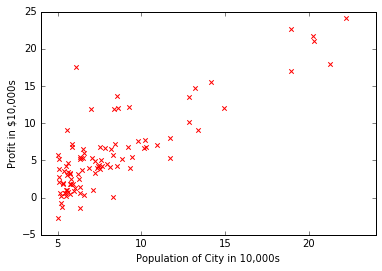

In [4]:
fig=plt.figure() #initiate figure
plt.scatter(X,y,marker='x',c='r') #plot data
plt.xlabel('Population of City in 10,000s') #set x axis
plt.ylabel('Profit in $10,000s') #set y axis
plt.ylim(-5,25) #set limits
plt.xlim(4,24)

### 2.2 Gradient Descent
Fit linear regression parameters $\theta$ to our dataset using gradient descent. 

#### Cost function : $$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}x^{i}-y^{i})^{2}$$
where $$h_{\theta}x=\theta^{T}x=\theta_{0}+\theta_{1}x_{1}$$
and $$\theta_{j}:=\theta_{j}-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}x^{i}-y^{i})x_{j}$$

In [32]:
X=np.concatenate((np.ones(m)[:,np.newaxis],data[:,0][:,np.newaxis]),1) #Add a new dimension for intercept term
theta=np.zeros((2,1)) #initialize fitting parameters
iterations=1500
alpha=.01

In [6]:
def computeCost(X,y,theta): #computes the costs of using theta as the parameter for linear regression to fit the data points in X and y
    m=y.shape[0] #number of traning examples
    hx=np.dot(X,theta)
    cost=0
    for i in range(m):
        cost+=(hx[i,0]-y[i])**2
    cost=cost/(2*m)
    return cost
computeCost(X,y,theta)

32.072733877455654

In [27]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m=y.shape[0]
    J_history=np.zeros(num_iters)
    theta_temp=np.empty(theta.shape)
    for i in range(num_iters):
        theta_temp[0]=theta[0]-alpha*(1/m)*np.dot((np.dot(X,theta)-y[:,np.newaxis]).T,X[:,0])[0]
        theta_temp[1]=theta[1]-alpha*(1/m)*np.dot((np.dot(X,theta)-y[:,np.newaxis]).T,X[:,1])[0]        
        theta=copy.deepcopy(theta_temp) #do not assign. Just copy
        J_history[i]=computeCost(X,y,theta) #record cost function
    return theta,J_history

In [33]:
theta,J_history=gradientDescent(X,y,theta,alpha,1500) #run gradient descent
theta

array([[-3.63029144],
       [ 1.16636235]])

In [28]:
def gradientDescent2(X,y,theta,alpha,num_iters):
    m=y.shape[0]
    J_history=np.zeros(num_iters)
    theta_temp=np.empty(theta.shape)
    for i in range(num_iters):
        for j in range(len(theta)):
            theta_temp[j]=theta[j]-alpha*(1/m)*np.dot((np.dot(X,theta)-y[:,np.newaxis]).T,X[:,j])[0]
        theta=copy.deepcopy(theta_temp) #do not assign. Just copy
        J_history[i]=computeCost(X,y,theta) #record cost function
    return theta,J_history

In [17]:
predict1=np.dot(np.array([1,3.5]),theta)[0] # takes inner product to get y_bar
print('For population = 35,000, we predict a profit of ', predict1*10000)
predict2 = np.dot([1,7],theta)[0]
print('For population = 70,000, we predict a profit of ', predict2*10000)

For population = 35,000, we predict a profit of  4519.7678677
For population = 70,000, we predict a profit of  45342.4501294


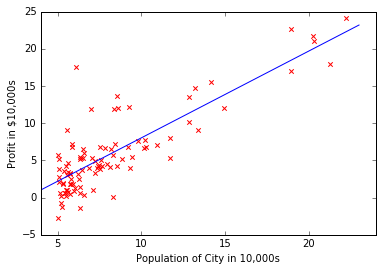

In [15]:
fig=plt.figure() #initiate figure
plt.scatter(X[:,1],y,marker='x',c='r') #plot data
plt.xlabel('Population of City in 10,000s') #set x axis
plt.ylabel('Profit in $10,000s') #set y axis
plt.ylim(-5,25) #set limits
plt.xlim(4,24)
plt.plot(range(4,24),eval('theta[0]+theta[1]*range(4,24)')) #create linear regression line

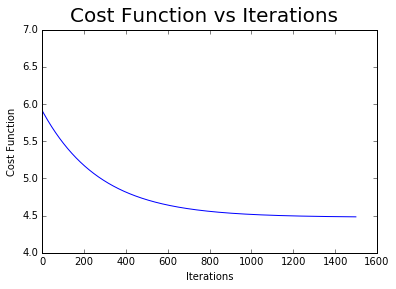

In [22]:
plt.plot(J_history)
plt.suptitle('Cost Function vs Iterations', fontsize=20)
plt.xlabel('Iterations') #set x axis
plt.ylabel('Cost Function') #set y axis

### 2.4 Visulizing $J(\theta)$

In [33]:
#grid to calculate cost function of theta's
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)

J_vals=np.zeros((len(theta0_vals),len(theta1_vals))) #intialize cost function as zeros

#fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.vstack((theta0_vals[i],theta1_vals[j]))
        J_vals[i,j]=computeCost(X,y,t)

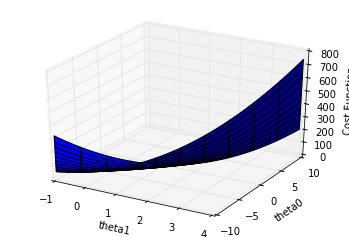

In [60]:
fig=plt.figure()
ax=fig.gca(projection='3d')
surf=ax.plot_surface(theta1_vals,theta0_vals,J_vals)
ax.set_xlabel('theta1')
ax.set_ylabel('theta0')
ax.set_zlabel('Cost Function')

## 3 Linear regression with multiple variables
Data contains a training set of housing prices in Portland, Oregon. First column is the size of house, second column is the number of bedrooms, and third column is the price of the house.

In [53]:
data=np.genfromtxt(r'https://raw.githubusercontent.com/eqiu/Classes/master/CS229/HW1/ex1data2.txt',delimiter=',')
X=data[:,0:2]
y=data[:,2]
m=len(y)

### 3.1 Feature Normalization
Preform feature scaling to make gradient descent converge faster.
Subtract mean value of each feature from dataset and divide the feature values by standard deviations. 

In [35]:
def normalize(matrix):
    return (matrix-np.mean(matrix,0))/np.std(matrix,axis=0,ddof=1)
X=normalize(X)

In [36]:
X=np.insert(X,0,1,axis=1) #insert column of 1's as intercept
theta=np.zeros((3,1)) #initialize fitting parameters
alpha=.01
num_iters=400

### 3.2 Gradient Descent
Preform gradient descent on multivariate regression

In [37]:
computeCost(X,y,theta)

65591548106.457443

In [38]:
def gradientDescentMulti(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history=np.zeros(num_iters)
    theta_temp=np.empty(theta.shape)
    for i in range(num_iters):
        for j in range(len(theta)):
            theta_temp[j]=theta[j]-alpha*(1/m)*np.dot((np.dot(X,theta)-y[:,np.newaxis]).T,X[:,j])[0]
        theta=copy.deepcopy(theta_temp) #do not assign. Just copy
        J_history[i]=computeCost(X,y,theta) #record cost function
    return theta,J_history

In [48]:
theta=np.zeros((3,1))
theta,J_history=gradientDescentMulti(X,y,theta,.3,50)
theta

array([[ 340412.65345227],
       [ 110572.96193087],
       [  -6591.38592285]])

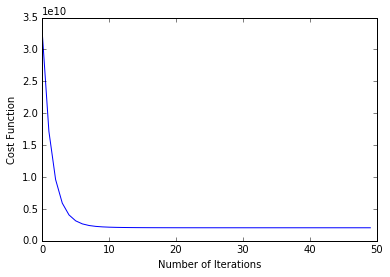

In [49]:
plt.plot(J_history)
plt.xlabel('Number of Iterations') #set x axis
plt.ylabel('Cost Function') #set y axis

### 3.3 Normal Equations
Closed-Form solution to linear regression is 
$$\theta=(X^{T}X)^{-1}X^{T}y$$

In [177]:
theta=np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([ 340412.65957447,  110631.05027885,   -6649.47427082])